In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:

# Importing the dataset
data = pd.read_csv(r"C:\Users\HP\Desktop\proj 1\Titanic-Dataset.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# No. of Rows and Columns
print(data.shape)

(891, 12)


In [4]:
# No. of missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Drop the cabin column from the df
data = data.drop(columns='Cabin', axis=1)

In [6]:
# Replacing the missing values in Age column with mean
print(data["Age"].fillna(data["Age"].mean(), inplace=True))


None


In [7]:
# Replacing the missing values in Embarked column with
print(data["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [8]:
print(data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True))
print(data.isnull().sum())

None
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [9]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


None
Axes(0.125,0.11;0.775x0.77)


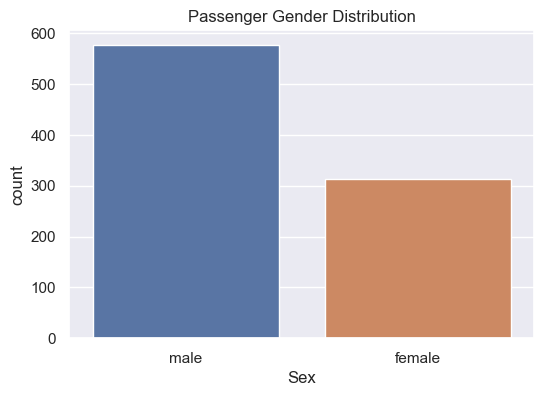

In [11]:
# DATA VISUALIZATION
print(sns.set())
# Count plot on the basis of "Gender"
plt.figure(figsize=(6, 4))
print(sns.countplot(data=data, x="Sex"))
plt.title("Passenger Gender Distribution")
plt.show()

Axes(0.125,0.11;0.775x0.77)


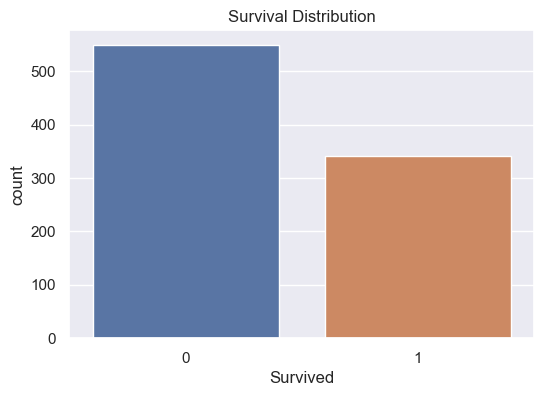

In [12]:
# Count plot on the basis of "Survived"

plt.figure(figsize=(6, 4))
print(sns.countplot(data=data, x="Survived"))
plt.title("Survival Distribution")
plt.show()

Axes(0.125,0.11;0.775x0.77)


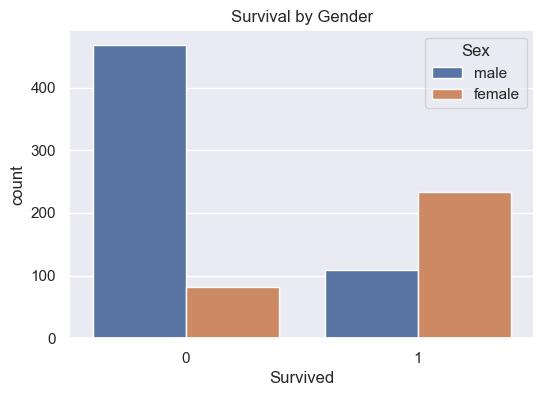

In [13]:
# Count plot on the basis of "Survived" and  "Gender"
plt.figure(figsize=(6, 4))
print(sns.countplot(data=data, x="Survived", hue="Sex"))
plt.title("Survival by Gender")
plt.show()


In [14]:
# ENCODING
# to know the value counts as per Gender
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
# to know the value counts as per Embarked
data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# Encoding the categorical columns
data.replace({"Sex": {"male": 0, "female": 1}, "Embarked": {"S": 0, "C": 1, "Q": 2}}, inplace=True)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [17]:
# SEPARATING FEATURES
x = data.drop(["PassengerId", "Name", "Survived", "Ticket"], axis= 1)
y = data["Survived"]
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [18]:
# SPLITTING DATA INTO TEST DATA AND TRAIN DATA
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
# LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
# ACCURACY SCORE
# Accuracy on the training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print("Accuracy on the training data is:", training_data_accuracy)

Accuracy on the training data is: 0.7907303370786517


In [22]:
# Accuracy on the test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print("Accuracy on the training data is:", test_data_accuracy)

Accuracy on the training data is: 0.8324022346368715


In [23]:
# PREDICTIVE SYSTEM ON GIVING INPUT
input_data = (1, 0, 46, 0, 1, 7.28, 1)
# change the input array into numpy array
input_as_numpy = np.asarray(input_data)


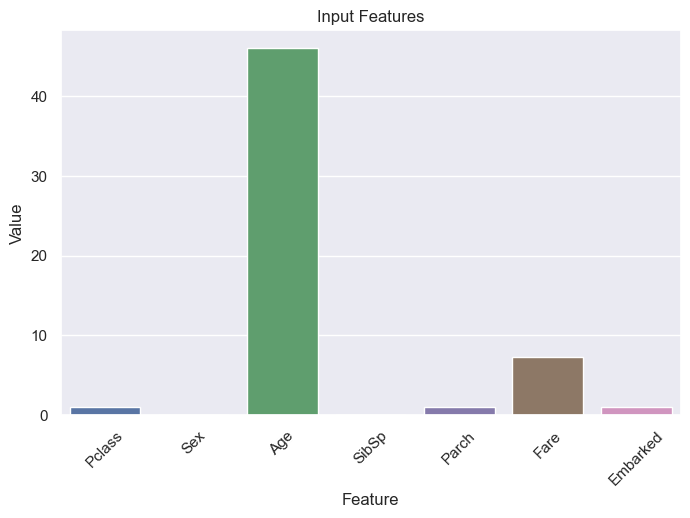

In [24]:
# VISUALIZING INPUT DATA
input_df = pd.DataFrame({"Feature": x.columns, "Value": input_data})
plt.figure(figsize=(8, 5))
sns.barplot(data=input_df, x="Feature", y="Value")
plt.title("Input Features")
plt.xticks(rotation=45)
plt.show()

In [25]:
# Reshape the numpy array as we are predicting for only one instance
input_reshaped = input_as_numpy.reshape(1, -1)
prediction = model.predict(input_reshaped)
print(prediction)

if prediction[0] == 0:
    print("THE PERSON WON'T BE SAVED FROM SINKING.")
else:
    print("THE PERSON WILL BE SAVED FROM SINKING.")

[0]
THE PERSON WON'T BE SAVED FROM SINKING.
